In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2)

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [2]:
from tensorflow import keras

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('h5/best-dropout-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 17ms/step - loss: 0.6926 - accuracy: 0.5256 - val_loss: 0.6923 - val_accuracy: 0.5328
Epoch 2/100
  9/313 [..............................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5295

C:\Users\gyeol\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 15ms/step - loss: 0.6913 - accuracy: 0.5572 - val_loss: 0.6909 - val_accuracy: 0.5502
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6894 - accuracy: 0.5635 - val_loss: 0.6885 - val_accuracy: 0.5730
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6863 - accuracy: 0.5890 - val_loss: 0.6844 - val_accuracy: 0.5998
Epoch 5/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6807 - accuracy: 0.6107 - val_loss: 0.6766 - val_accuracy: 0.6334
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6693 - accuracy: 0.6392 - val_loss: 0.6600 - val_accuracy: 0.6560
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6395 - accuracy: 0.6798 - val_loss: 0.6094 - val_accuracy: 0.7200
Epoch 8/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5830 - accuracy: 0.7200 - val_loss: 0.5695 - val_accuracy: 0.7210
Epoc

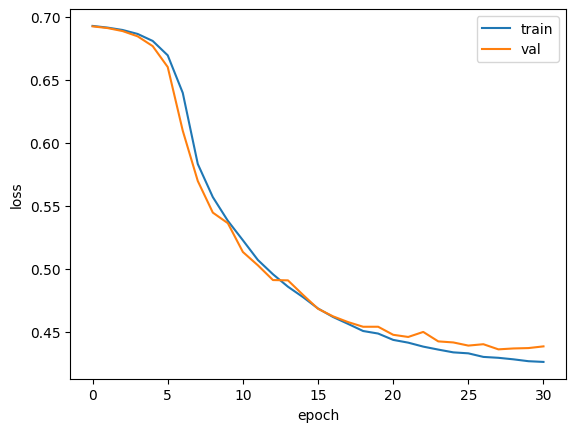

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()